In [38]:
from Preprocessing.preprocessing import PrepareDataset
from Modelling.modelling import Modelling
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# data = Modelling()
diffdata = data.get_difference()

In [64]:
print(diffdata.shape)
diffdata.dropna(inplace=True)
print(diffdata.shape)

(457, 25)
(436, 25)


In [84]:
data.meta

,Sensor naam,Unit,Brugdeel,Kopafstand,Element,Primaire lijn,min-date,max-date,file,#rows
0,5- 3,μstrain,draai,"14,21",Bovenkant ligger 4,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3050034
1,5- 5,μstrain,draai,"15,71",Bovenkant ligger 4,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3050154
2,5-21,μstrain,draai,"14,725",Bovenkant ligger 2,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3049995
3,5-22,μstrain,draai,"14,22",Bovenkant ligger 2,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3050105
4,5-23,μstrain,draai,"13,73",Bovenkant ligger 2,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3049938
5,6- 1,μstrain,draai,"10,61",Bovenkant ligger 2,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3050012
6,6- 2,μstrain,draai,"10,11",Bovenkant ligger 2,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3050130
7,6-15,μstrain,draai,"9,11",Onderkant ligger 2,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3049920
8,6-16,μstrain,draai,"6,65",Onderkant ligger 2,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3050049
9,7- 6,μstrain,draai,"14,78",Onderkant ligger 4,NaN,2019-11-27T17:34:39Z,2020-11-30T22:59:58Z,../data/unpacked/relevante-doorbuigingssensore...,3049993


In [69]:
diffdata.columns

Index(['uur', '10min', 'datetime', 'Temp', 'Windsnelheid', 'Windrichting',
       'Luchtvochtigheid', 'Luchtdruk', 'Neerslag', 'Zonneschijn', 'sec',
       'To-Tm_5- 3_diff', 'To-Tm_5- 5_diff', 'To-Tm_5-21_diff',
       'To-Tm_5-22_diff', 'To-Tm_5-23_diff', 'To-Tm_6- 1_diff',
       'To-Tm_6- 2_diff', 'To-Tm_6-15_diff', 'To-Tm_6-16_diff',
       'To-Tm_7- 6_diff', 'To-Tm_7- 7_diff', 'To-Tm_7- 8_diff',
       'To-Tm_7-21_diff', 'To-Tm_7-22_diff'],
      dtype='object')

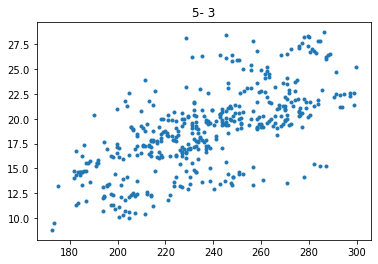

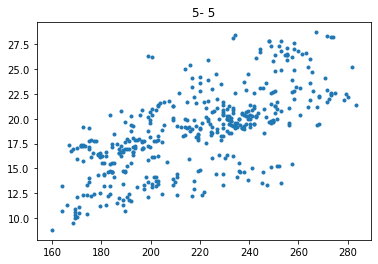

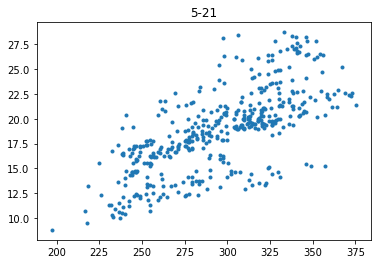

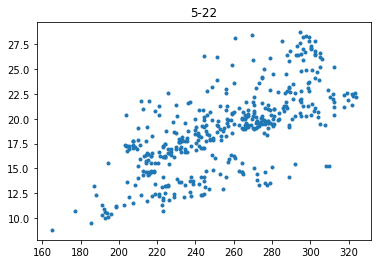

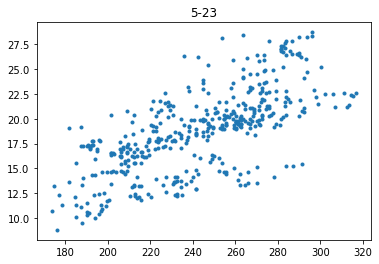

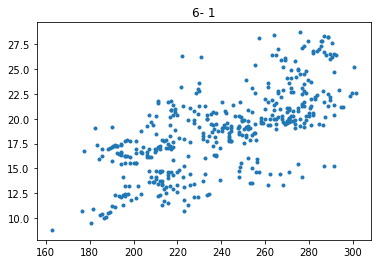

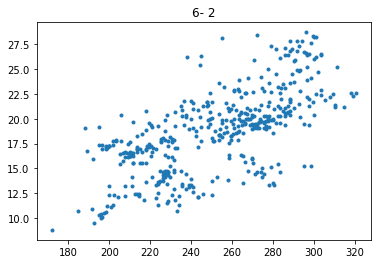

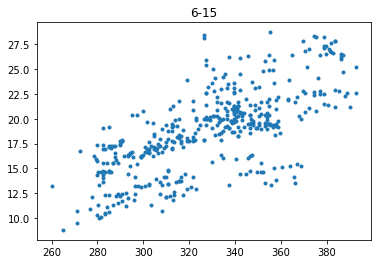

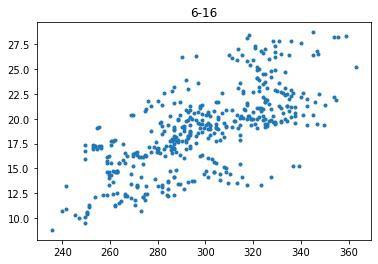

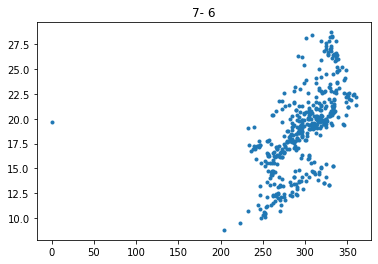

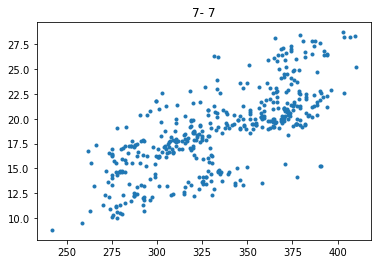

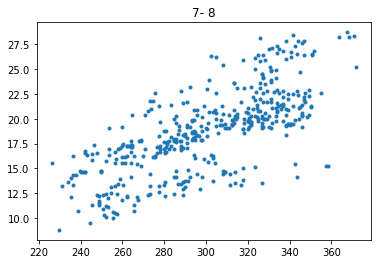

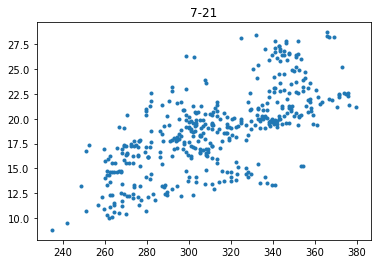

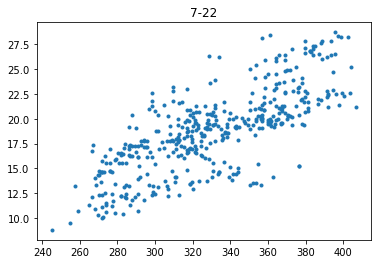

In [51]:
for sensor in data.meta['Sensor naam']:
    fig = plt.figure()
    plt.plot(diffdata[f'To-Tm_{sensor}_diff'], diffdata.Temp, '.')
    plt.title(f"{sensor}")

In [52]:
## Regression model
import statsmodels.api as sm

In [19]:
data.data[['To_6- 1-max', 'To_6- 1-min', 'Tm_6- 1-max', 'Tm_6- 1-min', 'Td_6- 1-max', 'Td_6- 1-min']].head()

,To_6- 1-max,To_6- 1-min,Tm_6- 1-max,Tm_6- 1-min,Td_6- 1-max,Td_6- 1-min
0,151.7,150.8,346.8,344.2,148.3,148.3
1,161.9,161.9,379.1,374.0,167.0,167.0
2,178.1,178.1,417.5,414.1,180.6,179.8
3,239.4,237.7,490.7,489.9,253.9,253.0
4,255.6,253.9,496.7,493.3,264.1,263.3


In [ ]:
#voeg toe: windsnelheid * windrichting
# Kunnen we de data van de sensoren op 1 hoop gooien? Met dummy variabele iets uit de meta data. Bijv. Element

In [82]:
X = diffdata[["Temp", "uur", "Luchtvochtigheid", "Windsnelheid", "Windrichting"]]
y = diffdata["To-Tm_7- 8_diff"]
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        To-Tm_7- 8_diff   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          8.28e-103
Time:                        21:26:11   Log-Likelihood:                -1893.9
No. Observations:                 436   AIC:                             3800.
Df Residuals:                     430   BIC:                             3824.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              282.1628     10.782     26.170      0.000     260.971     303.355
Temp                 3.4077      0.284     11.984      0.000       2.849       3.967
uur                  1.9529      0.320      6.112      0.000       1.325       2.581
Luchtvochtigheid    -0.8184      0.073    -11.160      0.000      -0.963      -0.674
Windsnelheid        -3.7323      0.394     -9.462      0.000      -4.508      -2.957
Windrichting         1.4075      0.591      2.383      0.018       0.247       2.568
==============================================================================
Omnibus:                       18.037   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.999
Skew:                           0.444   Prob(JB):                     4.54e-05
Kurtosis:                       3.560   Cond. No.                         856.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""